# Feature Engineering for Boston Dataset
Use feature engineering techniques to identify and select the most important features for predicting house prices in the Boston Housing dataset.

## Step 1: Load the Data
The Boston Housing dataset is available in sklearn.datasets. We’ll load it and explore its features.

In [3]:
import pandas as pd

# Load dataset from a URL (replace 'URL_TO_BOSTON_DATASET' with an actual URL to a CSV file)
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)

# Display the first few rows of the dataset to confirm it's loaded correctly
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
print("Column names in the dataset:", boston_df.columns)

Column names in the dataset: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [8]:
# Rename the column 'MEDV' to 'PRICE'
boston_df.rename(columns={'medv': 'PRICE'}, inplace=True)

# Verify the change
print(boston_df.columns)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'PRICE'],
      dtype='object')


## Step 2: Exploratory Data Analysis

Explore the data to understand the relationships between features and the target variable (PRICE). Some techniques we’ll use:

- Check for missing values
- Calculate correlations

In [9]:
print(boston_df.isnull().sum())  # Check for missing values
correlation_matrix = boston_df.corr()
correlation_with_price = correlation_matrix['PRICE'].sort_values(ascending=False)
print(correlation_with_price)


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
PRICE      0
dtype: int64
PRICE      1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: PRICE, dtype: float64


## Step 3: Visualize Correlations with Target Variable
Visualize the correlation between each feature and the target to identify which features might be most relevant.

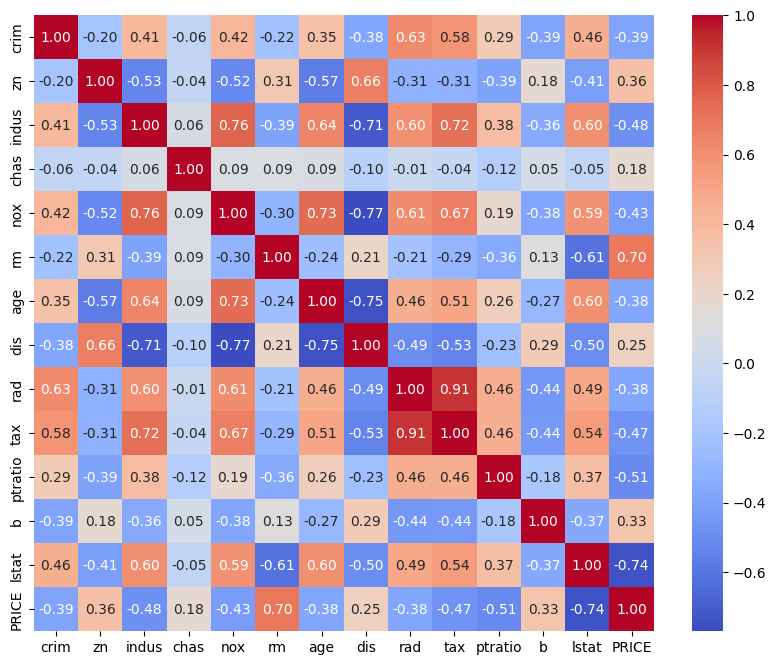

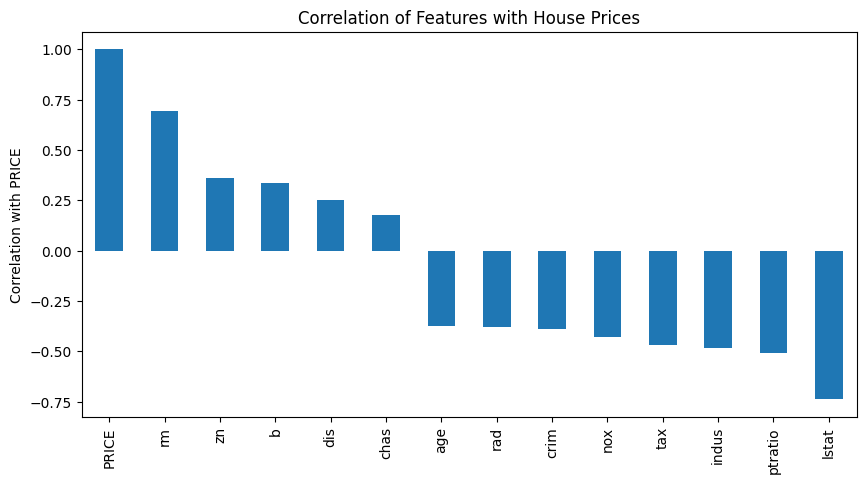

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Plot correlations of individual features with PRICE
correlation_with_price.plot(kind='bar', figsize=(10, 5))
plt.ylabel('Correlation with PRICE')
plt.title('Correlation of Features with House Prices')
plt.show()


## Step 4: Feature Selection Based on Correlation
Select features that show a strong correlation with the target variable (either positive or negative). Generally, a correlation above 0.5 (or below -0.5) indicates a stronger relationship.

In [11]:
# Select features with high absolute correlation
selected_features = correlation_with_price[correlation_with_price.abs() > 0.5].index
selected_features = selected_features.drop('PRICE')  # Exclude the target itself
print("Selected features:", list(selected_features))


Selected features: ['rm', 'ptratio', 'lstat']


## Step 5: Feature Transformation
- Log Transformation: Apply log transformations to skewed features to reduce skewness and improve linearity.
- Standardization: Standardize the data so that features have a mean of 0 and a standard deviation of 1.

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Log transform skewed features (e.g., 'CRIM' has a skewed distribution)
boston_df['CRIM_log'] = np.log1p(boston_df['crim'])
boston_df['LSTAT_log'] = np.log1p(boston_df['lstat'])

# Standardize the selected features
scaler = StandardScaler()
boston_df[selected_features] = scaler.fit_transform(boston_df[selected_features])


## Step 6: Feature Interaction (Optional)
Consider creating interaction terms or polynomial features if you think feature interactions could be helpful.

In [14]:
# Create interaction terms, e.g., RM*LSTAT, which might capture more information
boston_df['rm*lstat'] = boston_df['rm'] * boston_df['lstat']


## Step 7: Model Evaluation with Selected Features
After feature engineering, use the selected features in a regression model to evaluate their predictive power.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target
X = boston_df[selected_features]
y = boston_df['PRICE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 27.11495741558058
